In [1]:
q_num = 3
folder = f"D:/Comparison_{q_num}/"

In [1]:
from data import *
build_dataset(f"D:/duels_question_{q_num}.csv", 224, "D:/Sample_web_green", folder, 0.2, 0.2)

Saving as .npy
D:/duels_question_1.csv
Creating inputs from csv ...
Done
Saving test set ...
Done
Saving train set ...
Done
Converting to .tfrecords
Done


In [2]:
import tensorflow as tf
from Model_comparisons import *
dataset_val = tf.data.TFRecordDataset(folder+'data_val.tfrecord')
dataset_train = tf.data.TFRecordDataset(folder+'data_train.tfrecord')

batch_size = 6

dataset_train = dataset_train.map(map_fn)
dataset_train = dataset_train.shuffle(2048, reshuffle_each_iteration = True)
dataset_train = dataset_train.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_train = dataset_train.batch(batch_size)

dataset_val = dataset_val.map(map_fn)
dataset_val = dataset_val.prefetch(buffer_size=tf.data.AUTOTUNE)
dataset_val = dataset_val.batch(batch_size)

In [3]:
comp_model = comparisons_model(224)
#comp_model = load_model("D:/acc_checkpoint") #Or load in from a checkpoint

history_comp = comp_model.fit(dataset_train, validation_data = dataset_val, epochs = 50)

Epoch 1/50


c:\users\lmacl\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\functional.py:588: UserWarning: Input dict contained keys ['data_label'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


371/371 [==============================] - 76s 159ms/step - loss: 0.9860 - accuracy: 0.5027 - val_loss: 0.6880 - val_accuracy: 0.5665
Epoch 2/50
371/371 [==============================] - 59s 155ms/step - loss: 0.8776 - accuracy: 0.5638 - val_loss: 0.6447 - val_accuracy: 0.6223
Epoch 3/50
371/371 [==============================] - 59s 154ms/step - loss: 0.8288 - accuracy: 0.5953 - val_loss: 0.5998 - val_accuracy: 0.6655
Epoch 4/50
371/371 [==============================] - 57s 150ms/step - loss: 0.7907 - accuracy: 0.6385 - val_loss: 0.5937 - val_accuracy: 0.6960
Epoch 5/50
371/371 [==============================] - 57s 151ms/step - loss: 0.7708 - accuracy: 0.6515 - val_loss: 0.5653 - val_accuracy: 0.6853
Epoch 6/50
371/371 [==============================] - 57s 150ms/step - loss: 0.6897 - accuracy: 0.6951 - val_loss: 0.5590 - val_accuracy: 0.7122
Epoch 7/50
371/371 [==============================] - 57s 149ms/step - loss: 0.7129 - accuracy: 0.6803 - val_loss: 0.5453 - val_accuracy: 0.7

In [4]:
from keras import Model
vgg = Model(comp_model.layers[5].input, comp_model.layers[5].output)
rank_model = ranking_model(224, vgg_feature_extractor = vgg)

history_rank = comp_model.fit(dataset_train, validation_data = dataset_val, epochs = 50)

Epoch 1/50
371/371 [==============================] - 56s 149ms/step - loss: 0.4681 - accuracy: 0.7869 - val_loss: 0.6018 - val_accuracy: 0.7320
Epoch 2/50
371/371 [==============================] - 57s 150ms/step - loss: 0.4459 - accuracy: 0.7977 - val_loss: 0.5992 - val_accuracy: 0.7284
Epoch 3/50
371/371 [==============================] - 57s 150ms/step - loss: 0.4512 - accuracy: 0.8022 - val_loss: 0.6307 - val_accuracy: 0.7014
Epoch 4/50
371/371 [==============================] - 57s 150ms/step - loss: 0.4236 - accuracy: 0.8103 - val_loss: 0.5882 - val_accuracy: 0.7140
Epoch 5/50
371/371 [==============================] - 57s 150ms/step - loss: 0.4127 - accuracy: 0.8206 - val_loss: 0.7130 - val_accuracy: 0.6996
Epoch 6/50
371/371 [==============================] - 57s 150ms/step - loss: 0.3976 - accuracy: 0.8327 - val_loss: 0.6453 - val_accuracy: 0.7194
Epoch 7/50
371/371 [==============================] - 57s 150ms/step - loss: 0.4150 - accuracy: 0.8094 - val_loss: 0.6546 - val_ac

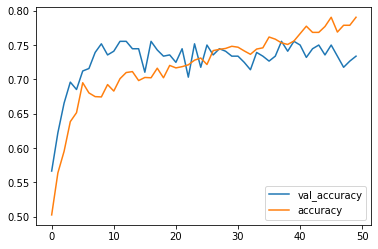

In [5]:
import matplotlib.pyplot as plt
plt.plot(history_comp.history['val_accuracy'], label="val_accuracy")
plt.plot(history_comp.history['accuracy'], label="accuracy")
plt.legend()
plt.savefig(folder + "comp_model_acc.png")

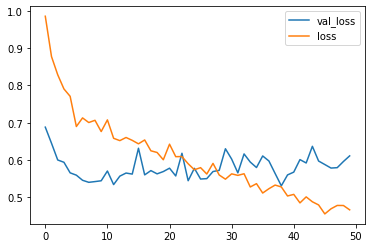

In [6]:
plt.plot(history_comp.history['val_loss'], label="val_loss")
plt.plot(history_comp.history['loss'], label="loss")
plt.legend()
plt.savefig(folder + "comp_model_loss.png")

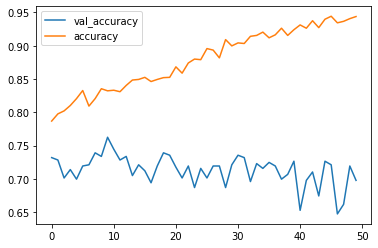

In [7]:
plt.plot(history_rank.history['val_accuracy'], label="val_accuracy")
plt.plot(history_rank.history['accuracy'], label="accuracy")
plt.legend()
plt.savefig(folder + "rank_model_acc.png")

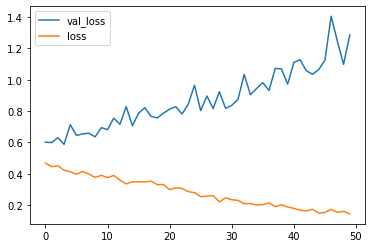

In [8]:
plt.plot(history_rank.history['val_loss'], label="val_loss")
plt.plot(history_rank.history['loss'], label="loss")
plt.legend()
plt.savefig(folder + "rank_model_loss.png")

In [9]:
rank_model.save(folder+"ranking_model.h5")

c:\users\lmacl\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [10]:
from Mapillary import *
api = Mapillary('MLY|4459801330748375|f17ddc8a7adbcbff6eea96b1cf4c2aad',
                [-75.7839321, 45.3210331], [-75.6517092, 45.4448763]) #Smaller Box around Ottawa
              #  [-75.9216253, 45.2157973], [-75.4695785, 45.4958371]) #Big Box around Ottawa

In [11]:
await api.generate_csv(rank_model, folder+"rankings.csv")

 Processing image 15936 | -75.643442697209 45.446899601139